# Seaborn

Seaborn is great for the data exploration stage as we can make complex plots very easily and they also look great. This notebook contains various different plot types for you reference.


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(color_codes=True) #overide maplot libs ugly colours.

# Data

We'll work with one of the toy datasets to get familiar with the plotting.

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Boxplot



/home/dom/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


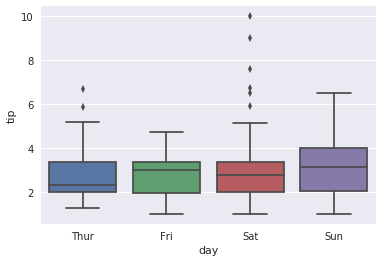

In [30]:
sns.boxplot(data = df,x="day",y="tip")

* Mean for thursday is the lowest
* On saturday there are lots of outliers
* Sunday has the highest variance in tips

# Distributions

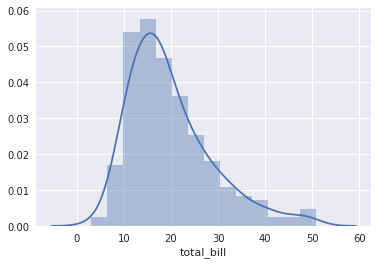

In [3]:
sns.distplot(df.total_bill)

* Not normally disributed, slightly skewed
* Mode is around 18
* Mean is around 25

In [33]:
df.total_bill.mean()

19.785942622950824

In [34]:
df.total_bill.mode()

0    13.42
dtype: float64

In [35]:
df.total_bill.median()

17.795

In [41]:
df.total_bill.agg(["mean","median"])

mean      19.785943
median    17.795000
Name: total_bill, dtype: float64

# Volin


/home/dom/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/home/dom/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


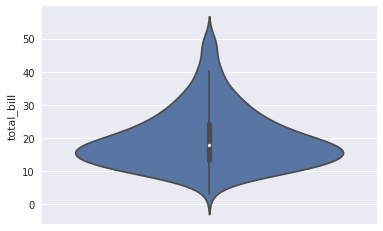

In [42]:
sns.violinplot(y =df.total_bill)

Violin plot is essentially a combination of distibution and a boxplot. We can see that the data is well centered around the mean is the above plot.

/home/dom/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/home/dom/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


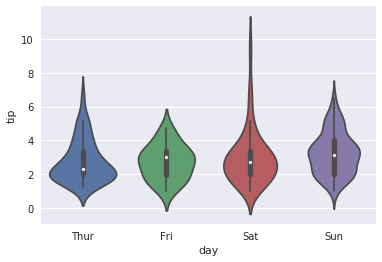

In [43]:
sns.violinplot(data=df,y='tip',x='day')

By comparing the violin plot for the 4 days we see that thursday and saturday have some outliers due to the longer tail in the plot. 

# PairPlot

Can be used to quicly plot all numerical data in a pairwise manner, we get hisograms on the diagonal and scatter plots on the off diagonals.

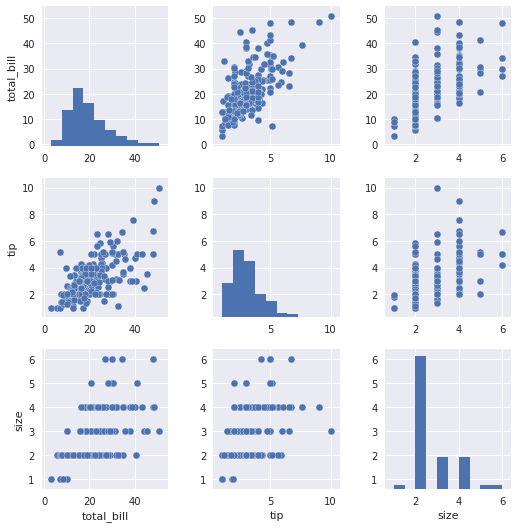

In [8]:
sns.pairplot(df)

No comment

# PairGrid

Pairgrid provides us a convient way to specify which type of plots we want on the grid.

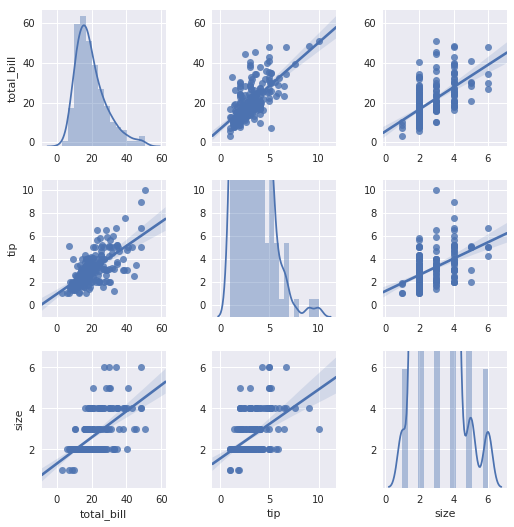

In [24]:
g = sns.PairGrid(df)
g.map_diag(sns.distplot)
g.map_offdiag(sns.regplot)

No information can really be concluded from this pair grid.

# Bar

/home/dom/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


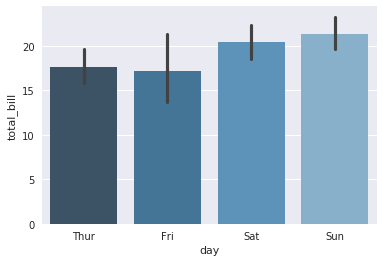

In [5]:
sns.barplot(data=df, x = 'day',y ="total_bill" ,palette="Blues_d" )

The black bars indicate the standard deviation, or the area that we are  95% certain that the mean is within that black line. Although we can see that on Saturday and Sunday people spend the most on average since the black error bars still overlap we can't statstically reject that there means are different.

# Heatmap

An easy way to look for correlated variables.

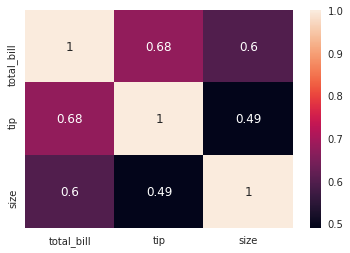

In [51]:
sns.heatmap(df.corr(), annot=True)

# Regression

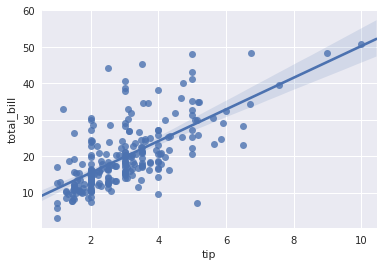

In [52]:
p = sns.regplot(y = df.total_bill , x = df.tip)

In [44]:
import statsmodels.formula.api as smf

In [48]:
results = smf.ols('total_bill ~ tip ' , data=  df).fit()

In [49]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_bill   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Fri, 16 Mar 2018   Prob (F-statistic):           6.69e-34
Time:                        10:21:42   Log-Likelihood:                -804.77
No. Observations:                 244   AIC:                             1614.
Df Residuals:                     242   BIC:                             1621.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7503      1.006      6.707      0.000       4.768       8.733
tip            4.3477      0.305     14.260      0.000       3.747       4.948
==============================================================================
Omnibus:                       58.831   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.799
Skew:                           1.185   Prob(JB):                     5.87e-27
Kurtosis:                       5.502   Cond. No.                         8.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After looking at R-Sqaure which is only around 45% so the simple linear regression is not a good fit.

# Facet Grid

Facet Grids are used to plot conditional releasionships, we can seperate data into different catergories to see how it effects there distribution.

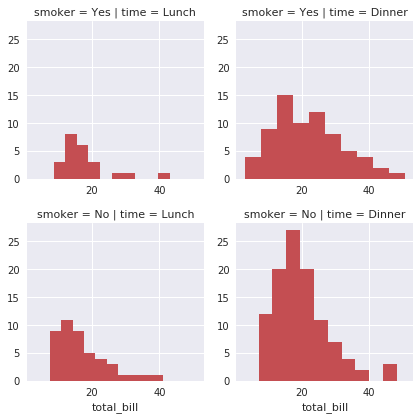

In [28]:
g = sns.FacetGrid(df, col="time",  row="smoker")
g.map(plt.hist, "total_bill", color="r")

We can see that during dinner people tend to pay more. Maybe we want to see if the distributions are statstically different from each other at dinner time. We could test if the means are differnt using the z-test.

# References

* [Seaborn API](https://seaborn.pydata.org/api.html)